## plot a raster on a basemap

In [1]:
import sys
sys.path.append('D:/ATLData/Documents/GitHub/Figures/')
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from Figures import basemap, ReportFigures

%matplotlib inline

In [2]:
# load original results from SWB
with rasterio.open('data/N_R_1k_north.tif') as src:
    rawswb_img = src.read()[0, :, :]

# load modified results
rbase2 = np.loadtxt('data/Rbase.dat', delimiter=' ')

rf = ReportFigures()
rf.set_style()

In [3]:
x = np.add.accumulate(np.ones(src.width) * src.res[0])
y= np.add.accumulate(np.ones(src.height) * src.res[1])
X, Y = np.meshgrid(x, y)


reading data/WIMI16.shp...
--> building dataframe... (may take a while for large shapefiles)
building PatchCollection...


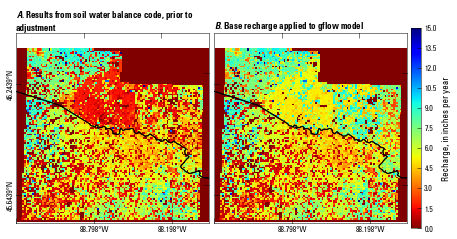

In [4]:
plt.rcParams['pdf.fonttype'] = 42
tick_interval = 0.6
ticks_kw = {'size': 8}
Map = basemap(extent=src.bounds, projection_shapefile='data/WIMI16.shp',
              subplots=(1, 2),
              tick_interval=tick_interval, 
              parallels_kw=ticks_kw, meridians_kw=ticks_kw)
              
Map.add_shapefile('data/WIMI16.shp', lw=1, ec='k', fc='None', alpha=1,
                  zorder=9)
cmap = 'jet_r'
alpha = 1
pc = Map.maps[0].pcolormesh(X, Y, np.flipud(rawswb_img), 
                       zorder=-1, cmap=cmap, alpha=alpha, 
                       lw=0, vmax=15)
pc2 = Map.maps[1].pcolormesh(X, Y, np.flipud(rbase2 * 365 * 12), 
                       zorder=-1, cmap=cmap, alpha=alpha, lw=0, 
                       vmax=15)

box = Map.axes[-1].get_position()
cbpad = 0.01
cbshrink = 0.16
cbthickness = 0.02
cbpad += 1
Map.axes[-1].set_position([box.x0*cbpad, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*cbpad + box.width*cbpad, box.y0 + cbshrink, 
                    cbthickness, box.height - cbshrink*2])
plt.colorbar(pc, cax = axColor, orientation="vertical", label='Recharge, in inches per year')
plt.subplots_adjust(wspace=0.03)
rf.title(Map.axes[0], 'Results from Soil Water Balance Code, prior to adjustment',
         subplot_prefix='A')
rf.title(Map.axes[1], 'Base recharge applied to GFLOW model',
        subplot_prefix='B')
plt.savefig('north_rch_adjustment.pdf')